<a href="https://colab.research.google.com/github/janitadevassy/CODSOFT/blob/main/Codsoft_TitanicSurvivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns



In [ ]:
from google.colab import files
uploaded=files.upload()



In [ ]:
file_name = next(iter(uploaded))  # Extracts the file name from the uploaded dictionary
titanic_data = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))
titanic_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Check for missing values
print(titanic_data.isnull().sum())
print(titanic_data.columns)
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].mode()[0],inplace=True)
titanic_data.isnull().sum().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


327

In [ ]:
# Identify columns with non-numeric data
non_numeric_cols = titanic_data.select_dtypes(exclude='number').columns.tolist()
print(non_numeric_cols)

# Handle non-numeric columns (for example, drop them)
titanic_data = titanic_data.drop(columns=non_numeric_cols)

# Now, re-attempt model fitting after dropping non-numeric columns
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model and train it
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Accuracy: 0.6071428571428571


In [ ]:
titanic_data['Survived'].value_counts()


0    266
1    152
Name: Survived, dtype: int64

In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

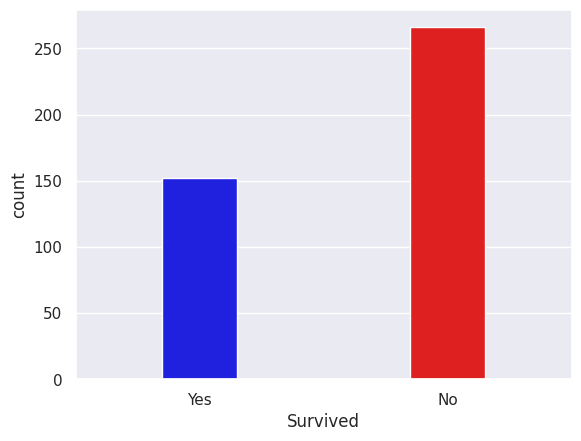

In [ ]:
# Replace '1' with 'Yes' and '0' with 'No' in the 'Survived' column
titanic_data['Survived'] = titanic_data['Survived'].replace({1: 'Yes', 0: 'No'})
sns.set()
sns.countplot(x='Survived',width=0.3, data=titanic_data.replace({'Survived': {1: 'Yes', 0: 'No'}}),
              order=['Yes', 'No'], palette=['blue','red'])

<Axes: xlabel='Pclass', ylabel='count'>

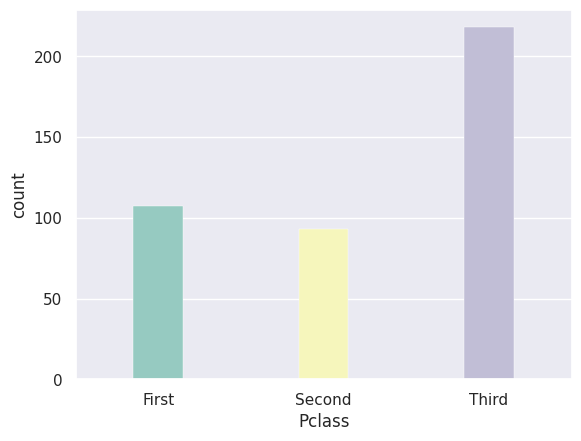

In [ ]:
sns.countplot(x=titanic_data['Pclass'].replace({1: 'First', 2: 'Second', 3: 'Third'}),
              width=0.3, order=['First', 'Second', 'Third'], palette='Set3', linewidth=0.3)

<Axes: xlabel='Pclass', ylabel='count'>

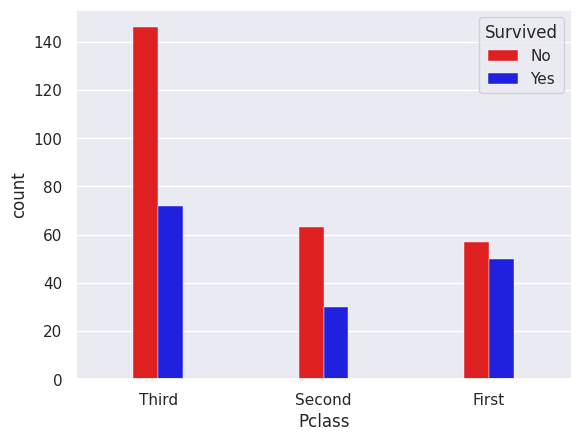

In [ ]:
sns.countplot(x=titanic_data['Pclass'].replace({1: 'First', 2: 'Second', 3: 'Third'}),
              hue='Survived', data=titanic_data,
              width=0.3, palette={'Yes': 'blue', 'No': 'red'}, linewidth=0.3)


In [ ]:
# Define features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable ('Survived')
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train_encoded)

# Make predictions on the test set
predictions = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, predictions)
print(f"Accuracy: {accuracy}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, predictions))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, predictions))

Accuracy: 0.6666666666666666
Confusion Matrix:
[[46  4]
 [24 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.92      0.77        50
           1       0.71      0.29      0.42        34

    accuracy                           0.67        84
   macro avg       0.69      0.61      0.59        84
weighted avg       0.68      0.67      0.62        84

